In [1]:
import librosa
from librosa import display
from librosa import feature

import numpy as np
from numpy import typing as npt

from matplotlib import pyplot as plt
import scipy

In [3]:
y, sr = librosa.load("./Mozart_Turkish_March.wav", duration=25)

In [5]:
def spectral_centroid_analysis(y: npt.ArrayLike, sr: int, save_to_csv: bool = True) -> None :

    S, phase = librosa.magphase(librosa.stft(y=y))
    cent = librosa.feature.spectral_centroid(S=S)
    times = librosa.times_like(cent)

    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax)
    ax.plot(times, cent.T, label='Spectral centroid', color='w')
    ax.legend(loc='upper right')
    ax.set(title='log Power spectrogram')

    if save_to_csv :
        result = np.vstack((times, cent))
        np.savetxt('centroid.csv', result.T, fmt="%.3f")

    

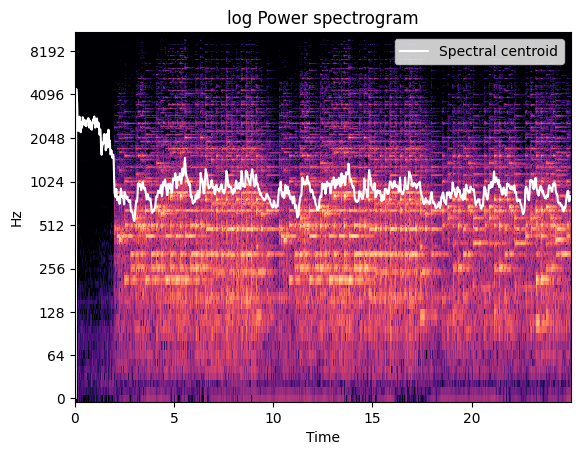

In [6]:
spectral_centroid_analysis(y, sr)

In [9]:
def rolloff_frequency_analysis(y: npt.ArrayLike, sr: int, save_to_csv: bool = True) -> None :

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
    rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
    times = librosa.times_like(rolloff)
    S, phase = librosa.magphase(librosa.stft(y))

    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax)
    ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
    ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
            label='Roll-off frequency (0.01)')
    ax.legend(loc='lower right')
    ax.set(title='log Power spectrogram')

    if save_to_csv :
        result = np.vstack((times, rolloff, rolloff_min))
        np.savetxt('rollOffFreq.csv', result.T, fmt="%.3f")

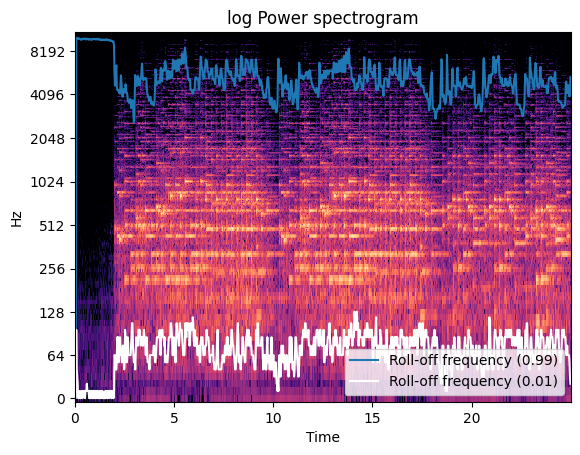

In [10]:
rolloff_frequency_analysis(y, sr)

In [11]:
def spectral_bandwidth_analysis(y: npt.ArrayLike, sr: int, save_to_csv: bool = True) -> None :
    
    S, phase = librosa.magphase(librosa.stft(y=y))
    spec_bw = librosa.feature.spectral_bandwidth(S=S)
    times = librosa.times_like(spec_bw)

    fig, ax = plt.subplots(nrows=2, sharex=True)
    centroid = librosa.feature.spectral_centroid(S=S)
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='log Power spectrogram')
    ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                       np.minimum(centroid[0] + spec_bw[0], sr/2),
                       alpha=0.5, label='Centroid +- bandwidth')
    ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
    ax[1].legend(loc='lower right')

    if save_to_csv :
        result = np.vstack((times, spec_bw))
        np.savetxt('spectral_bandwidth.csv', result.T, fmt="%.3f")

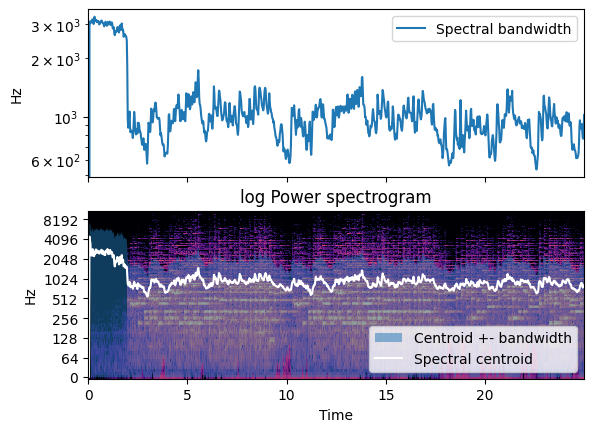

In [13]:
spectral_bandwidth_analysis(y, sr)

In [14]:
def harmonic_percussive_source_separation(y: npt.ArrayLike, sr: int) -> None :

    D = librosa.stft(y)
    H, P = librosa.decompose.hpss(D)

    fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
    img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),ref=np.max),
                                   y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='Full power spectrogram')
    ax[0].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(D))),
                             y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='Harmonic power spectrogram')
    ax[1].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max(np.abs(D))),
                             y_axis='log', x_axis='time', ax=ax[2])
    ax[2].set(title='Percussive power spectrogram')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')

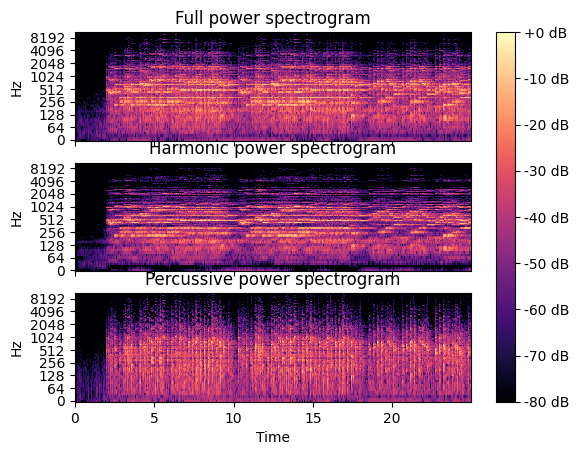

In [15]:
harmonic_percussive_source_separation(y, sr)